# 读入CSV文件

## 函数原型

```python
loadtxt(fname, dtype=float, comments='#', delimiter=None,
            converters=None, skiprows=0, usecols=None, unpack=False,
            ndmin=0, encoding='bytes', max_rows=None)

```

In [67]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# data.csv 为苹果公司的历史股价数据
# 第一列为股票代码以标识股票（苹果公司股票代码为AAPL）
# 第二列为dd-mm-yyyy格式的日期
# 第三列为空
# 第四列为开盘价
# 第五列为最高价
# 第六列为最低价
# 第七列为收盘价
# 第八列为当日的成交量


# 读取收盘价和当日的成交量
c, v = np.loadtxt('Data/data.csv', delimiter=',', usecols=(6, 7), unpack=True)

# 成交量加权平均值 (VWAP)
> VWAP（Volume-Weighted Average Price，成交量加权平均价格）是一个非常重要的经济学量，
它代表着金融资产的“平均”价格。某个价格的成交量越高，该价格所占的权重就越大。VWAP
就是以成交量为权重计算出来的加权平均值，常用于算法交易

In [4]:
vwap = np.average(c, weights=v)
vwap

350.5895493532009

# 时间加权平均价格 (TWAP)
> TWAP（Time-Weighted Average Price，时间加权平均价格）是另一种“平均”价格的指标。基本的思想就是最近的价格重要性大一些，所以我们应该对近期的价格给以较高的权重。最简单的方法就是用arange函数创建一个从0开始依次增长的自然数序列，自然数的个数即为收盘价的个数。当然，这并不一定是正确的计算TWAP的方式

In [5]:
t = np.arange(len(c))
twap = np.average(c, weights=t)
twap

352.4283218390804

# 极差 (ptp)
>  $ptp$ 函数可以计算数组的取值范围。该函数返回的是数组元素的最大值和最小值之间的差值。也就是说，返回值等于 $max(array)$ - $min(array)$

In [6]:
# 读取每日最高价和最低价
h, l = np.loadtxt('Data/data.csv', delimiter=',', usecols=(4, 5), unpack=True)

In [7]:
np.ptp(h)

24.859999999999957

In [8]:
np.ptp(l)

26.970000000000027

# 中位数 (median)
> 将各个数值按大小顺序排列起来，形成一个数列，居于数列中间位置的那个数即为中位数

In [11]:
# 读取收盘价
c = np.loadtxt('Data/data.csv', delimiter=',', usecols=(6,), unpack=True)
np.median(c)

352.055

In [12]:
# 手动实现中位数算法

## 对数据进行排序
## `np.msort(a)` is equivalent to  `np.sort(a, axis=0)`
sorted_close = np.msort(c)

In [20]:
N = len(c)

# 对于长度为偶数的数组，中位数的值应该等于中间那两个数的平均值
if N % 2 == 0:
    print((sorted_close[N // 2] + sorted_close[(N-1) // 2]) / 2)
    
# 对于长度为奇数的数组，中位数的值应该等于中间那个数 
else:
    print(sorted_close[(N-1) // 2])

352.055


# 方差
> 方差能够体现变量变化的程度

In [23]:
np.var(c)

50.126517888888884

> 方差是指各个数据与所有数据算术平均数的离差平方和除以数据个数所得到的值  

$$ s_N^2 = \frac{\sum_{i=1}^N(x_i - \bar{x})^2}{n} $$

In [24]:
np.mean((c - c.mean()) ** 2)

50.126517888888884

> 注意注意样本方差和总体方差在计算上的区别：  
> + 总体方差是用数据个数去除离差平方和   
> + 样本方差则是用样本数据个数减1去除离差平方和，其中样本数据个数减1（即$n-1$）称为自由度。之所以有这样的差别，是为了保证样本方差是一个无偏估计量。

# diff
> 计算一个由相邻数组元素的差值构成的数组   
> diff 返回的数组比原始数组少一个元素

In [29]:
c

array([336.1 , 339.32, 345.03, 344.32, 343.44, 346.5 , 351.88, 355.2 ,
       358.16, 354.54, 356.85, 359.18, 359.9 , 363.13, 358.3 , 350.56,
       338.61, 342.62, 342.88, 348.16, 353.21, 349.31, 352.12, 359.56,
       360.  , 355.36, 355.76, 352.47, 346.67, 351.99])

In [28]:
np.diff(c)

array([  3.22,   5.71,  -0.71,  -0.88,   3.06,   5.38,   3.32,   2.96,
        -3.62,   2.31,   2.33,   0.72,   3.23,  -4.83,  -7.74, -11.95,
         4.01,   0.26,   5.28,   5.05,  -3.9 ,   2.81,   7.44,   0.44,
        -4.64,   0.4 ,  -3.29,  -5.8 ,   5.32])

# 日期数据
> NumPy是面向浮点数运算的，因此需要对日期做一些专门的处理，否则会报错

```python
dates, close=np.loadtxt('Data/data.csv', delimiter=',', usecols=(1,6), unpack=True)

ValueError: could not convert string to float: '28-01-2011'
```

In [32]:
# 定义一个函数用于将日期转换成浮点数
def datestr2num(s):
    import datetime
    return datetime.datetime.strptime(s.decode(), '%d-%m-%Y').date().weekday()

dates, close = np.loadtxt('Data/data.csv', delimiter=',', usecols=(1, 6), 
                         converters={1 : datestr2num}, unpack=True)
dates

array([4., 0., 1., 2., 3., 4., 0., 1., 2., 3., 4., 0., 1., 2., 3., 4., 1.,
       2., 3., 4., 0., 1., 2., 3., 4., 0., 1., 2., 3., 4.])

# where
> 根据指定的条件返回所有满足条件的数组元素的索引值

# take
> 按照索引值从数组中取出相应的元素

In [37]:
# 创建一个包含5个元素的数组，数组元素将初始化为0
averages = np.zeros(5)

for i in range(5):
    
    # 提取索引
    indices = np.where(dates == i)
    
    # 提取索引对应的数值
    prices = np.take(close, indices)
    
    # 计算平均值
    avg = round(np.mean(prices), 3)
    print(f'Day {i}, Prices [{prices}], Average: {avg}')
    
    # 存储平均值
    averages[i] = avg
    
averages

Day 0, Prices [[[339.32 351.88 359.18 353.21 355.36]]], Average: 351.79
Day 1, Prices [[[345.03 355.2  359.9  338.61 349.31 355.76]]], Average: 350.635
Day 2, Prices [[[344.32 358.16 363.13 342.62 352.12 352.47]]], Average: 352.137
Day 3, Prices [[[343.44 354.54 358.3  342.88 359.56 346.67]]], Average: 350.898
Day 4, Prices [[[336.1  346.5  356.85 350.56 348.16 360.   351.99]]], Average: 350.023


array([351.79 , 350.635, 352.137, 350.898, 350.023])

In [43]:
# 最大值索引 及 最大值

f'Max Value Index: {np.argmax(averages)}, Max Value: {np.max(averages)}'

'Max Value Index: 2, Max Value: 352.137'

In [42]:
# 最小值索引 及 最小值

f'Min Value Index: {np.argmin(averages)}, Min Value: {np.min(averages)}'

'Min Value Index: 4, Max Value: 350.023'

# ravel
> 降维，返回一维数组

+ ravel()：如果没有必要，不会产生源数据的副本 
+ flatten()：返回源数据的副本 
+ squeeze()：只能对维数为1的维度降维
+ reshape(-1) 也可以“拉平”多维数组

In [44]:
dates

array([4., 0., 1., 2., 3., 4., 0., 1., 2., 3., 4., 0., 1., 2., 3., 4., 1.,
       2., 3., 4., 0., 1., 2., 3., 4., 0., 1., 2., 3., 4.])

In [51]:
np.where(dates == 0)  # 注意： 返回的是一个tuple

(array([ 1,  6, 11, 20, 25]),)

In [53]:
np.ravel(np.where(dates == 0))  # 展平为一维

array([ 1,  6, 11, 20, 25])

In [54]:
# 找出第一个星期一在整个数组中的索引

np.ravel(np.where(dates == 0))[0]

1

# 简单移动平均线
> 简单移动平均线（simple moving average）通常用于分析时间序列上的数据。为了计算它，需要定义一个N个周期的移动窗口，按照时间序列滑动这个窗口，并计算窗口内数据的均值

> 简单移动平均线只不过是计算与等权重的指示函数的卷积， Numpy 提供了 $convolve$ 函数

In [59]:
# 使用ones函数创建一个长度为N的元素均初始化为1的数组，然后对整个数组除以N，即可得到权重
N = 5

weights = np.ones(N) / N
weights

array([0.2, 0.2, 0.2, 0.2, 0.2])

In [70]:
c

array([336.1 , 339.32, 345.03, 344.32, 343.44, 346.5 , 351.88, 355.2 ,
       358.16, 354.54, 356.85, 359.18, 359.9 , 363.13, 358.3 , 350.56,
       338.61, 342.62, 342.88, 348.16, 353.21, 349.31, 352.12, 359.56,
       360.  , 355.36, 355.76, 352.47, 346.67, 351.99])

> 简单移动平均线可以用信号处理技术求解
>> 与 $1/N$ 的权重进行卷积运算，N 为移动平均窗口的大小

In [61]:
# 使用这些权重值，调用convolve函数

np.convolve(weights, c)

array([ 67.22 , 135.084, 204.09 , 272.954, 341.642, 343.722, 346.234,
       348.268, 351.036, 353.256, 355.326, 356.786, 357.726, 358.72 ,
       359.472, 358.214, 354.1  , 350.644, 346.594, 344.566, 345.096,
       347.236, 349.136, 352.472, 354.84 , 355.27 , 356.56 , 356.63 ,
       354.052, 352.45 , 281.378, 210.226, 139.732,  70.398])

In [62]:
# 取出中间的长度为N的部分 (即两者做卷积运算时完全重叠的区域)

np.convolve(weights, c)[N-1 : -N+1]

array([341.642, 343.722, 346.234, 348.268, 351.036, 353.256, 355.326,
       356.786, 357.726, 358.72 , 359.472, 358.214, 354.1  , 350.644,
       346.594, 344.566, 345.096, 347.236, 349.136, 352.472, 354.84 ,
       355.27 , 356.56 , 356.63 , 354.052, 352.45 ])

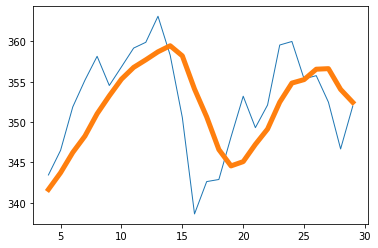

In [69]:
# 绘制曲线

sma = np.convolve(weights, c)[N-1 : -N+1]
t = np.arange(N-1, len(c))
plt.plot(t, c[N-1 : ], lw=1.0)
plt.plot(t, sma, lw=5.0)

# 指数移动平均线
> 指数移动平均线（exponential moving average）也是一种流行的技术指标。指数移动平均线使用的权重是指数衰减的。对历史上的数据点赋予的权重以指数速度减小，但永远不会到达0。

> 与`简单移动平均线`的主要区别在于：权重

# exp 
> exp，高等数学里以自然常数`e`为底的指数函数；返回`e`的`n`次方，`e`是一个常数为2.71828

In [76]:
# 构造权重值

N = 5
weights= np.exp(np.linspace(-1, 0, N))
weights

array([0.36787944, 0.47236655, 0.60653066, 0.77880078, 1.        ])

In [77]:
# 对权重值做归一化处理

weights /= weights.sum()
weights

array([0.11405072, 0.14644403, 0.18803785, 0.24144538, 0.31002201])

In [79]:
# 计算指数移动平均值

np.convolve(weights, c)[N-1 : -N+1]

array([340.5975344 , 343.06107601, 345.55611377, 346.86543931,
       349.16687079, 352.05941068, 354.81884961, 356.48612788,
       357.38745929, 357.73487019, 359.07112525, 358.98460222,
       356.58308089, 353.67019505, 348.67384286, 344.78329523,
       343.44479866, 346.03834711, 348.09272645, 351.47563932,
       353.76772573, 354.17134307, 356.28771523, 357.51137004,
       355.45939324, 353.25619921])

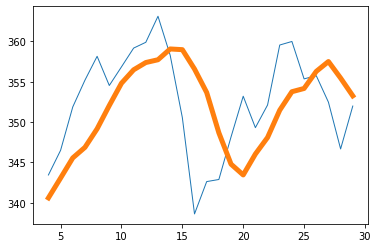

In [78]:
ema = np.convolve(weights, c)[N-1 : -N+1]
t = np.arange(N-1, len(c))
plt.plot(t, c[N-1 :], lw=1.0)
plt.plot(t, ema, lw=5.0)

# clip
> 返回一个修剪过的数组，也就是将所有比给定最大值还大的元素全部设为给定的最大值，而所有比给定最小值还小的元素全部设为给定的最小值

In [80]:
a = np.arange(5)
a

array([0, 1, 2, 3, 4])

In [81]:
a.clip(1, 2)

array([1, 1, 2, 2, 2])

# compress
> 返回一个根据给定条件筛选后的数组

In [83]:
a = np.arange(5)
a.compress(a > 2)

array([3, 4])